Τεχνικές Εξόρυξης Δεδομένων - 1η άσκηση

1115201600046 ΕΛΛΗΝΑ ΚΩΝΣΤΑΝΤΙΝΑ & 1115201600071 ΚΟΛΙΟΥ ΣΤΑΥΡΟΥΛΑ

In [1]:
#Import the libraries needed.

import os
import pandas as pd
from pandas import DataFrame, read_csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sb
from wordcloud import WordCloud, STOPWORDS
import folium
from IPython.display import Image

In [2]:
#Read the csv files of each month with read_csv pandas function. As we see we need only the listings.csv files.
Location1 = r'/.....data/april/listings.csv'
df1 = pd.read_csv(Location1, header = 0, low_memory = False)
Location2 = r'/.....data/march/listings.csv'
df2 = pd.read_csv(Location2, header = 0, low_memory = False)
Location3 = r'/.....data/febrouary/listings.csv'
df3 = pd.read_csv(Location3, header = 0, low_memory = False)

#For each month, we drop the columns that we won't need for the questions from the listings.csv files.
df_ap = df1.drop(columns=['listing_url', 'scrape_id', 'last_scraped', 'summary', 'space', 'experiences_offered', 'neighborhood_overview', 'notes', 'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_location', 'host_about', 'host_response_time', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'street', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'state', 'market', 'smart_location', 'country_code', 'country', 'is_location_exact', 'square_feet', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'calendar_last_scraped', 'number_of_reviews_ltm', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'requires_license', 'license', 'jurisdiction_names', 'is_business_travel_ready', 'require_guest_profile_picture', 'require_guest_phone_verification', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'reviews_per_month'])
df_mar = df2.drop(columns=['listing_url', 'scrape_id', 'last_scraped', 'summary', 'space', 'experiences_offered', 'neighborhood_overview', 'notes', 'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_location', 'host_about', 'host_response_time', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'street', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'state', 'market', 'smart_location', 'country_code', 'country', 'is_location_exact', 'square_feet', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'calendar_last_scraped', 'number_of_reviews_ltm', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'requires_license', 'license', 'jurisdiction_names', 'is_business_travel_ready', 'require_guest_profile_picture', 'require_guest_phone_verification', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'reviews_per_month'])
df_feb = df3.drop(columns=['listing_url', 'scrape_id', 'last_scraped', 'summary', 'space', 'experiences_offered', 'neighborhood_overview', 'notes', 'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_location', 'host_about', 'host_response_time', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'street', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'state', 'market', 'smart_location', 'country_code', 'country', 'is_location_exact', 'square_feet', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'calendar_last_scraped', 'number_of_reviews_ltm', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'requires_license', 'license', 'jurisdiction_names', 'is_business_travel_ready', 'require_guest_profile_picture', 'require_guest_phone_verification', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'reviews_per_month'])

#Add to each DataFrame a column 'Month' to help us with the questions below.
df_ap['Month'] = 'April'
df_mar['Month'] = 'March'
df_feb['Month'] = 'Febrouary'

#We concat the 3 files so that we don't miss any data and we rename the columns with the names
#as they appear in the exercise given.
result = pd.concat([df_ap, df_mar, df_feb], ignore_index=True)
train = result.rename(columns={'name': 'Name', 'bedrooms': 'Bedrooms', 'beds':'Beds', 'review_scores_rating':'Review_scores_rating','number_of_reviews': 'Number_of_reviews', 'neighbourhood': 'Neighbourhood', 'latitude':'Latitude', 'longitude':'Longitude', 'last_review':'Last_review','instant_bookable':'Instant_bookable','host_since':'Host_since','host_response_rate':'Host_response_rate','host_identity_verified':'Host_identity_verified','host_has_profile_pic':'Host_has_profile_pic','first_review':'First_review','description':'Description','city':'City','bed_type':'Bed_type','bathrooms':'Bathrooms','accommodates':'Accomodates','amenities':'Amenities','room_type':'Room_type','property_type':'Property_type','availability_365':'Availability_365','minimun_nights':'Minimum_nights'})

#We write our fixed file to csv file named train.csv, which we will use for our questions below.
train.to_csv('train.csv', sep=',')

#We read the csv files of reviews for each month with read_csv pandas function.
Loc1 = r'/.....data/april/reviews.csv'
Reviews1 = pd.read_csv(Loc1, header=0, low_memory = False)
Loc2 = r'/.....data/march/reviews.csv'
Reviews2 = pd.read_csv(Loc2, header=0, low_memory = False)
Loc3 = r'/.....data/febrouary/reviews.csv'
Reviews3 = pd.read_csv(Loc3, header=0, low_memory = False)

#We drop the columns that we will not need.
Rev1 = Reviews1.drop(columns=['id','reviewer_id','reviewer_name'])
Rev2 = Reviews2.drop(columns=['id','reviewer_id','reviewer_name'])
Rev3 = Reviews3.drop(columns=['id','reviewer_id','reviewer_name'])

#We add an extra column named Month.
Rev1['Month'] = 'April'
Rev2['Month'] = 'March'
Rev3['Month'] = 'Febrouary'

#We concat the 3 files and change the name of "listing_id" to "id".
reviews = pd.concat([Rev1, Rev2, Rev3])
reviews.rename(columns = {'listing_id':'id'}, inplace = True)

FileNotFoundError: [Errno 2] File /.....data/april/listings.csv does not exist: '/.....data/april/listings.csv'

##                                            QUESTION no1

The most frequent type of room_type is: 


Room_type  Amount
0  Entire home/apt   24765

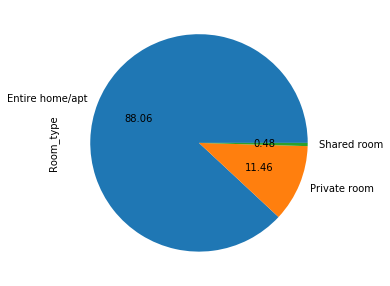

In [3]:
#Using value_counts we count the values for every room type and we choose the first one with head(1).
print("The most frequent type of room_type is: ")
df1 = train['Room_type'].value_counts()

#And we show at a pie plot the results.
plot = df1.plot.pie(y='Amount', figsize=(5, 5),autopct='%.2f')

#We use rename so that our columns have the right title.
df1.head(1).reset_index().rename(columns = {"index": "Room_type", "Room_type": "Amount"})

##                                            QUESTION no2

price
Month               
April      60.992128
Febrouary  61.169527
March      60.890398

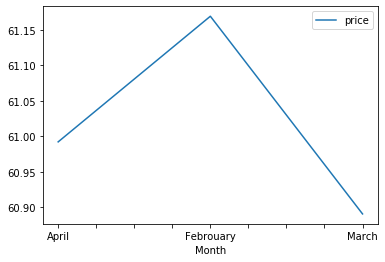

In [4]:
#We choose only the columns needed and we present them below.
df2 = train.loc[:,['Month','price']]
df2['price'] = df2['price'].str[1:]
df2['price'] = pd.to_numeric(df2['price'], errors='coerce')
df = df2.groupby('Month').mean()

#And we show at a line plot the process of the average prices for each month.
df.plot(kind='line')
df

##                                            QUESTION no3

Number_of_reviews
Neighbourhood                   
Plaka                     132361
Koukaki                    90357
Neos Kosmos                83348
Psyri                      54353
Metaxourgeio               44792

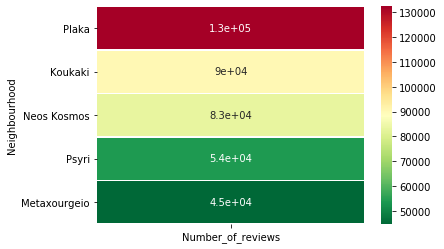

In [5]:
#For each neighbourhood we sum up the number_of_reviews and we choose the 5 largest ones.
#We show the results with a heatmap.
df3 = train.groupby('Neighbourhood').sum()[['Number_of_reviews']].nlargest(5, ['Number_of_reviews'])
df = df3.head()
sb.heatmap(df, cmap='RdYlGn_r', linewidths=0.5, annot=True)
df

##                                            QUESTION no4

Neighbourhood    id
0         Plaka  1216

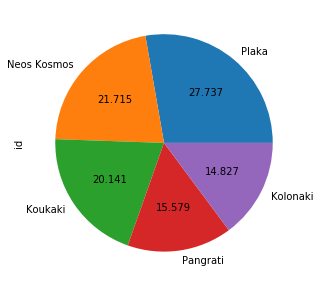

In [6]:
#We count the amount of id for each neighbourhood and we choose the maximum one.
df4 = train.groupby('Neighbourhood').id.nunique().nlargest(5)

df4.value_counts()

#And we show at a pie plot the results.
plot = df4.plot.pie(y='Amount', figsize=(5, 5),autopct='%.3f')

df4.reset_index().head(1)

##                                            QUESTION no5

id
Neighbourhood  Month         
Agios Loukas   April       71
               Febrouary   68
               March       70
Agios Nikolaos April      209
               Febrouary  196
...                       ...
Thiseio        Febrouary  314
               March       94
Votanikos      April       59
               Febrouary   50
               March       54

[96 rows x 1 columns]

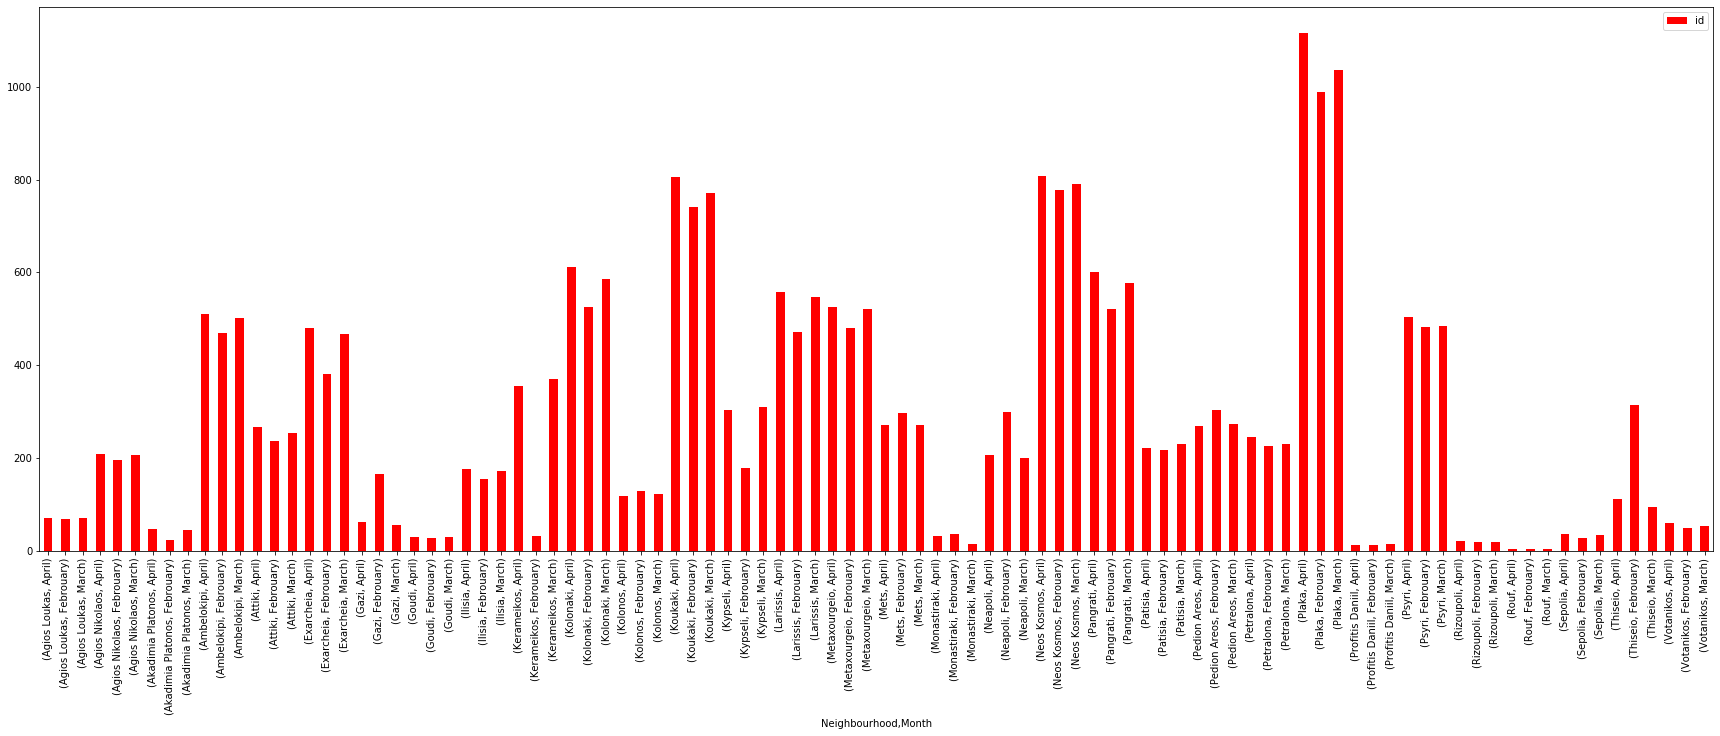

In [7]:
#We count the amount of unique ids for each neighbourhood and each month.
df = train.groupby(['Neighbourhood', 'Month']).id.nunique().reset_index()

#We can't see every neighbourhood so we use an extra plot to have everything shown.
df5 = train.groupby(['Neighbourhood', 'Month']).count()[['id']]
df5.plot(figsize=(30,10),kind='bar', color='r')
df5

##                                            QUESTION no6

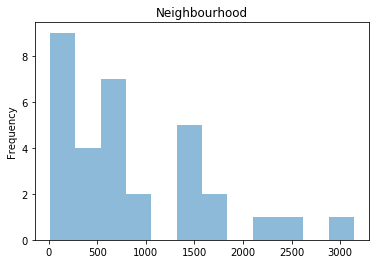

In [8]:
#We count the values in every neighbourhood and we present them in an histogram
h = train['Neighbourhood'].value_counts()
h.plot.hist(bins=12, alpha=0.5, title='Neighbourhood')

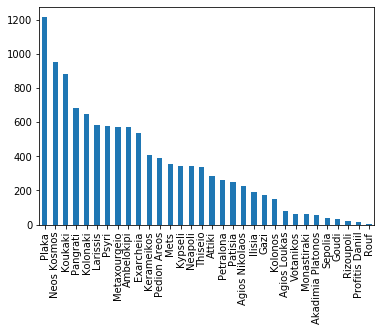

In [9]:
#We also can't see exactly every neighbourhood so we have an extra plot to see the difference among neighbourhoods.
df6 = train.loc[:,['Neighbourhood','id']].drop_duplicates()
df6['Neighbourhood'].value_counts().plot(kind='bar')

##                                            QUESTION no7

id
Neighbourhood     Room_type            
Agios Loukas      Entire home/apt   177
Agios Nikolaos    Entire home/apt   524
Akadimia Platonos Entire home/apt    92
Ambelokipi        Entire home/apt  1386
Attiki            Entire home/apt   647
Exarcheia         Entire home/apt  1171
Gazi              Entire home/apt   240
Goudi             Entire home/apt    63
Ilisia            Entire home/apt   473
Kerameikos        Entire home/apt   682
Kolonaki          Entire home/apt  1615
Kolonos           Entire home/apt   321
Koukaki           Entire home/apt  2104
Kypseli           Entire home/apt   645
Larissis          Entire home/apt  1276
Metaxourgeio      Entire home/apt  1157
Mets              Entire home/apt   782
Monastiraki       Entire home/apt    58
Neapoli           Entire home/apt   608
Neos Kosmos       Entire home/apt  2177
Pangrati          Entire home/apt  1557
Patisia           Entire home/apt   620
Pedion Areos      Entire home/apt   679
Petralona         Entire home/apt   637
Plaka             Entire home/apt  2869
Profitis Daniil   Entire home/apt    38
Psyri             Entire home/apt  1182
Rizoupoli         Entire home/apt    40
Rouf              Entire home/apt    12
Sepolia           Entire home/apt    89
Thiseio           Entire home/apt   478
Votanikos         Entire home/apt   146

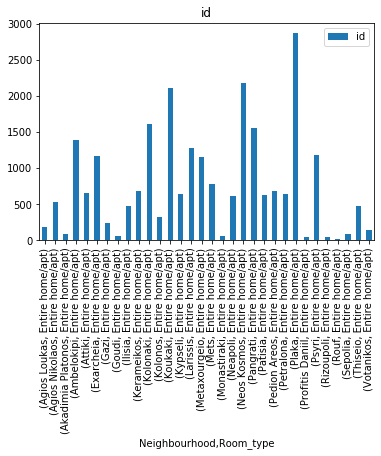

In [10]:
#For each neighbourhood we find the amount of room types based on id and we choose only the most frequent one.
df7 = train.groupby(['Neighbourhood', 'Room_type']).count()[['id']]
df = df7.groupby('Neighbourhood').head(1)

#We show the results to a bar plot too, so we can see better the differences.
df.plot(kind='bar', subplots=True)
df

##                                            QUESTION no8

Room_type       price
0  Entire home/apt  187.911348
1     Private room  136.836879
2      Shared room   55.625000

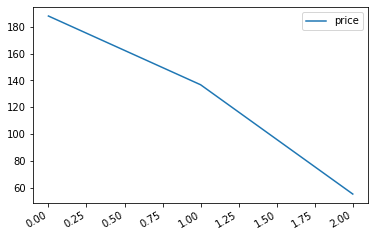

In [11]:
#We choose the columns needed, we drop the duplicates and we find the most expensive room type on average.
df8 = train.loc[:,['Room_type','price']]
df8 = df8.drop_duplicates()
df8['price'] = df8['price'].str[1:]
df8['price'] = pd.to_numeric(df8['price'], errors='coerce')
df = df8.groupby('Room_type').mean().reset_index()

#And we show the results in a line plot.
df.plot(kind='line', subplots=True)
df

##                                            QUESTION no9

In [13]:
#We save the dataframe only for April.
df9 = train.loc[train['Month'] == 'April']
#We used small sample because the file was too large and it didn't run with a bigger one.
df9 = df9.sample(900)

#First latitude and longitude.
Latitude = 37.98888
Longitude = 23.76431

#With folium.Map we show every house and the popups have the bed types, the room types and the transit.
m = folium.Map(location=[Latitude, Longitude], zoom_start=12)
for lat, lon, bed, room, transit in zip(df9['Latitude'], df9['Longitude'], df9['Bed_type'], df9['Room_type'], df9['transit']):
    folium.Marker(
        [lat, lon],
        popup = ('Bed_type: ' + str(bed).capitalize() + '<br>'
                 'Room_type: ' + str(room) + '<br>'
                 'Transit: ' + str(transit) +'%'
                ),
        ).add_to(m)
m

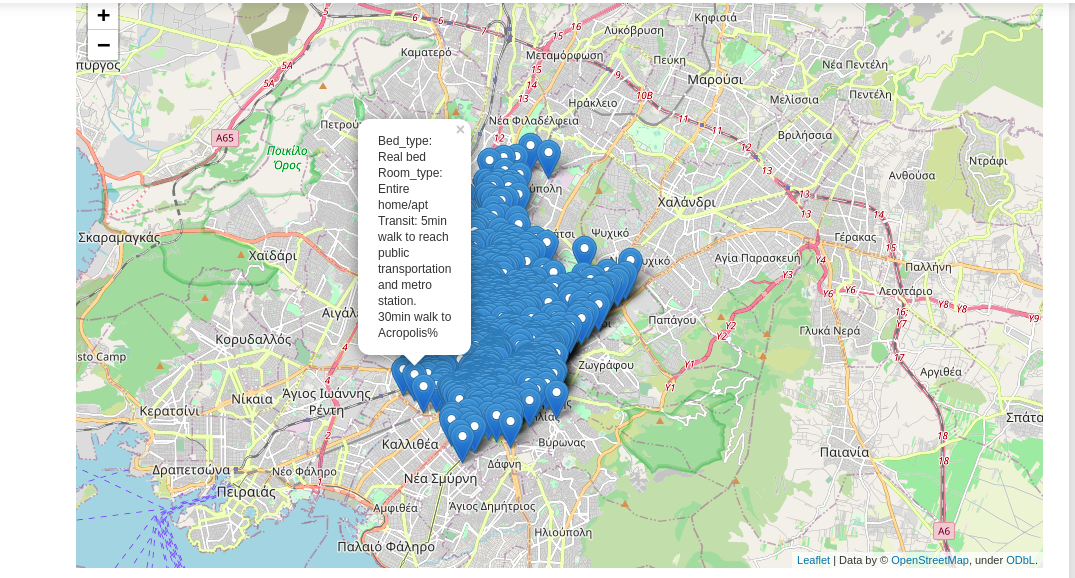

In [14]:
#We have also a screenshot from our pc with an example of a map in case the original is too large for you
#and it didn't show the results. We had this issue when we were trying to do the question so here is a picture.
Image(filename="/home/konnaell/Desktop/TED/picture.png", width=1000, height=1000)

##                                            QUESTION no10

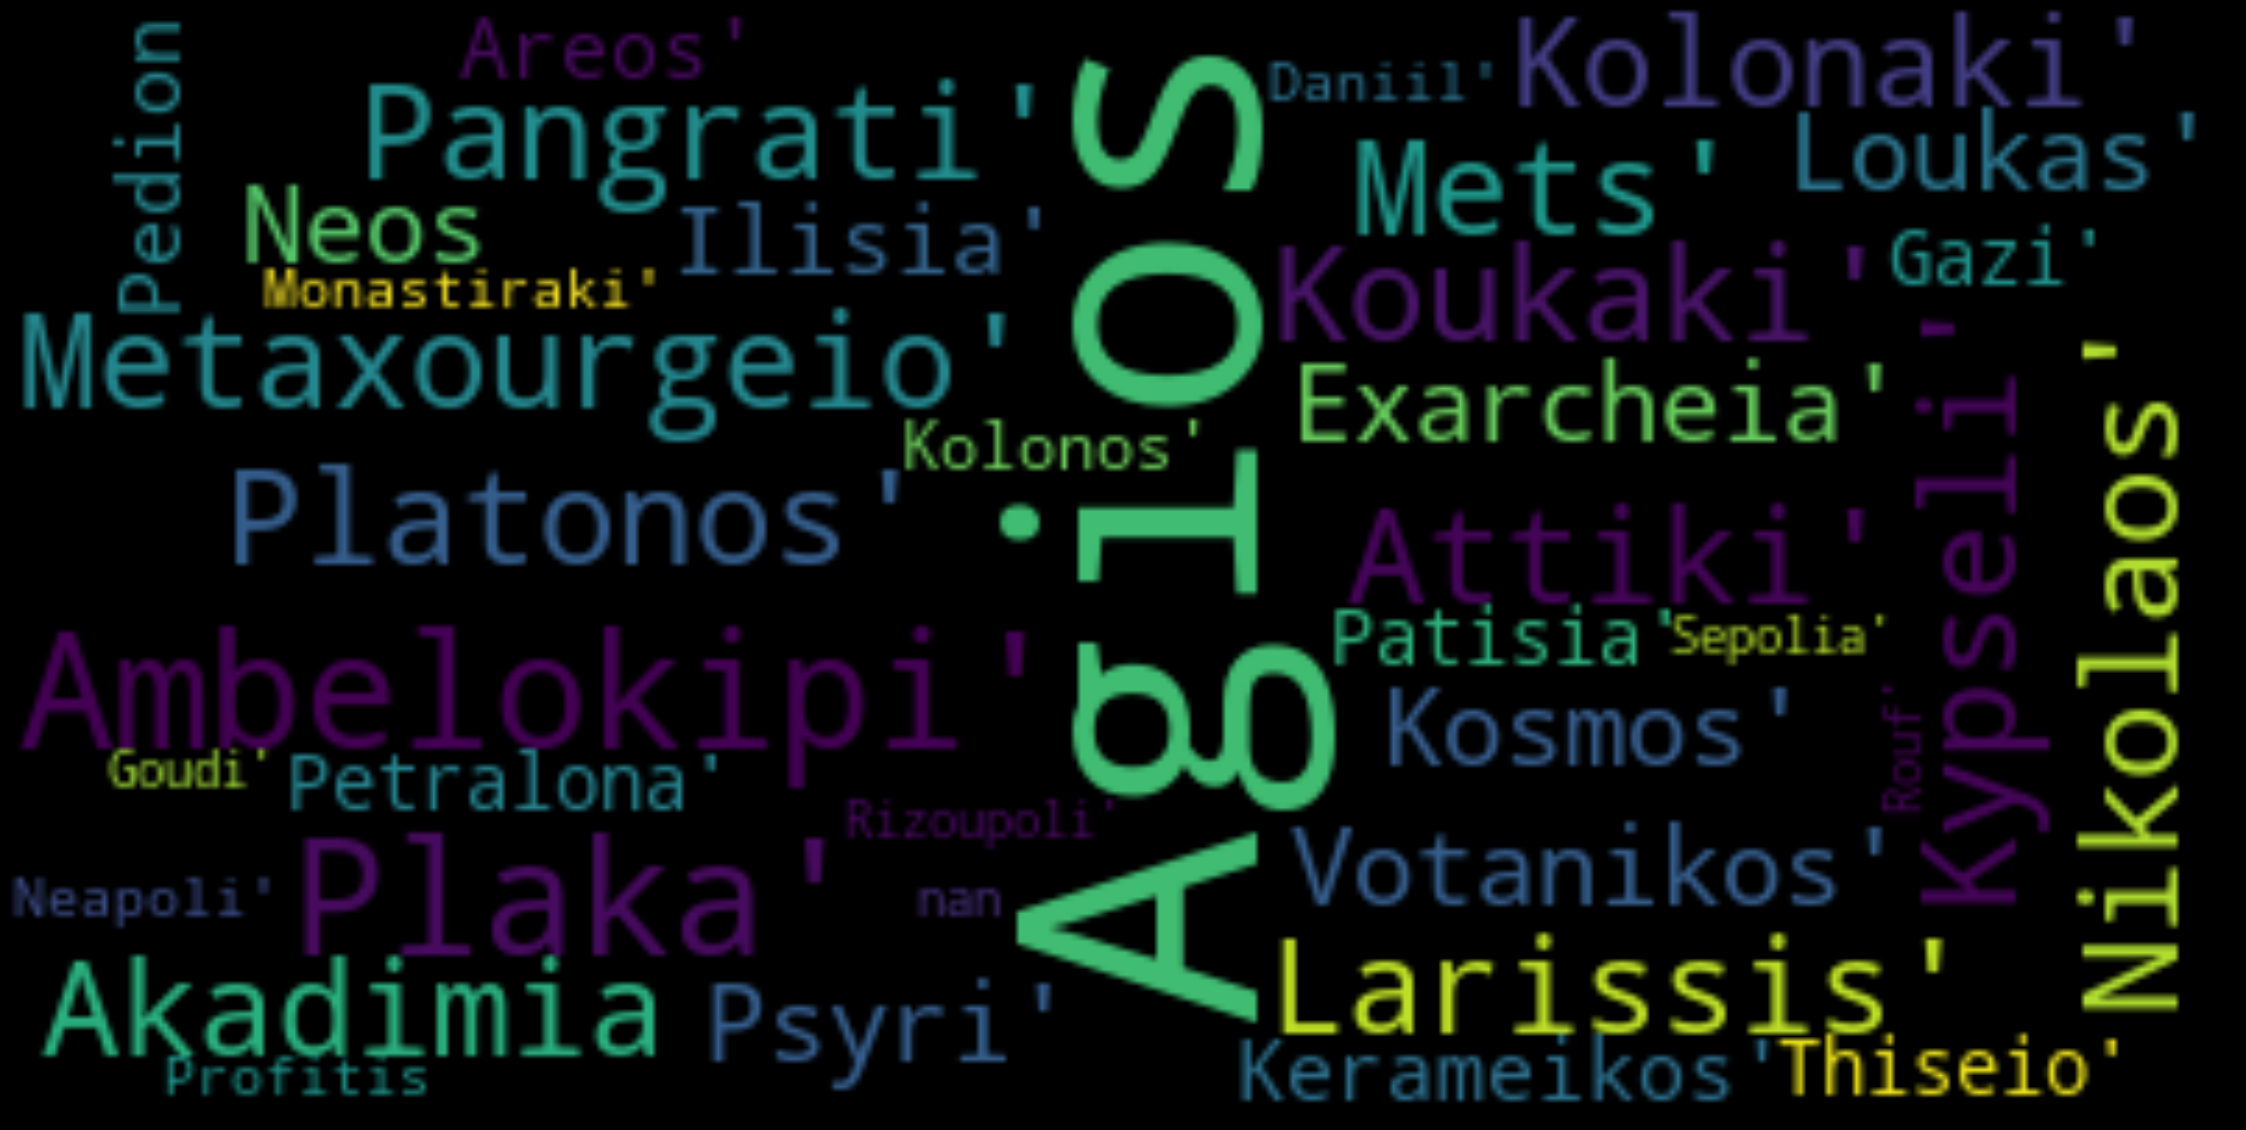

In [15]:
#We sort the values of id and we drop duplicates of the neighbourhood column.
neighb = train[['Neighbourhood','id']]
neighb.sort_values('id', ascending = False)
neighb = neighb.drop_duplicates(subset='Neighbourhood', keep='first')

#We have the values needed and we show them in a wordcloud.
text = neighb['Neighbourhood'].values
wordcloud = WordCloud(width = 3000, height = 2000, background_color = 'black', stopwords = STOPWORDS)

wordcloud = WordCloud().generate(str(text))
fig = plt.figure(figsize = (40, 30), facecolor = 'k', edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')

plt.axis("off")
plt.show()

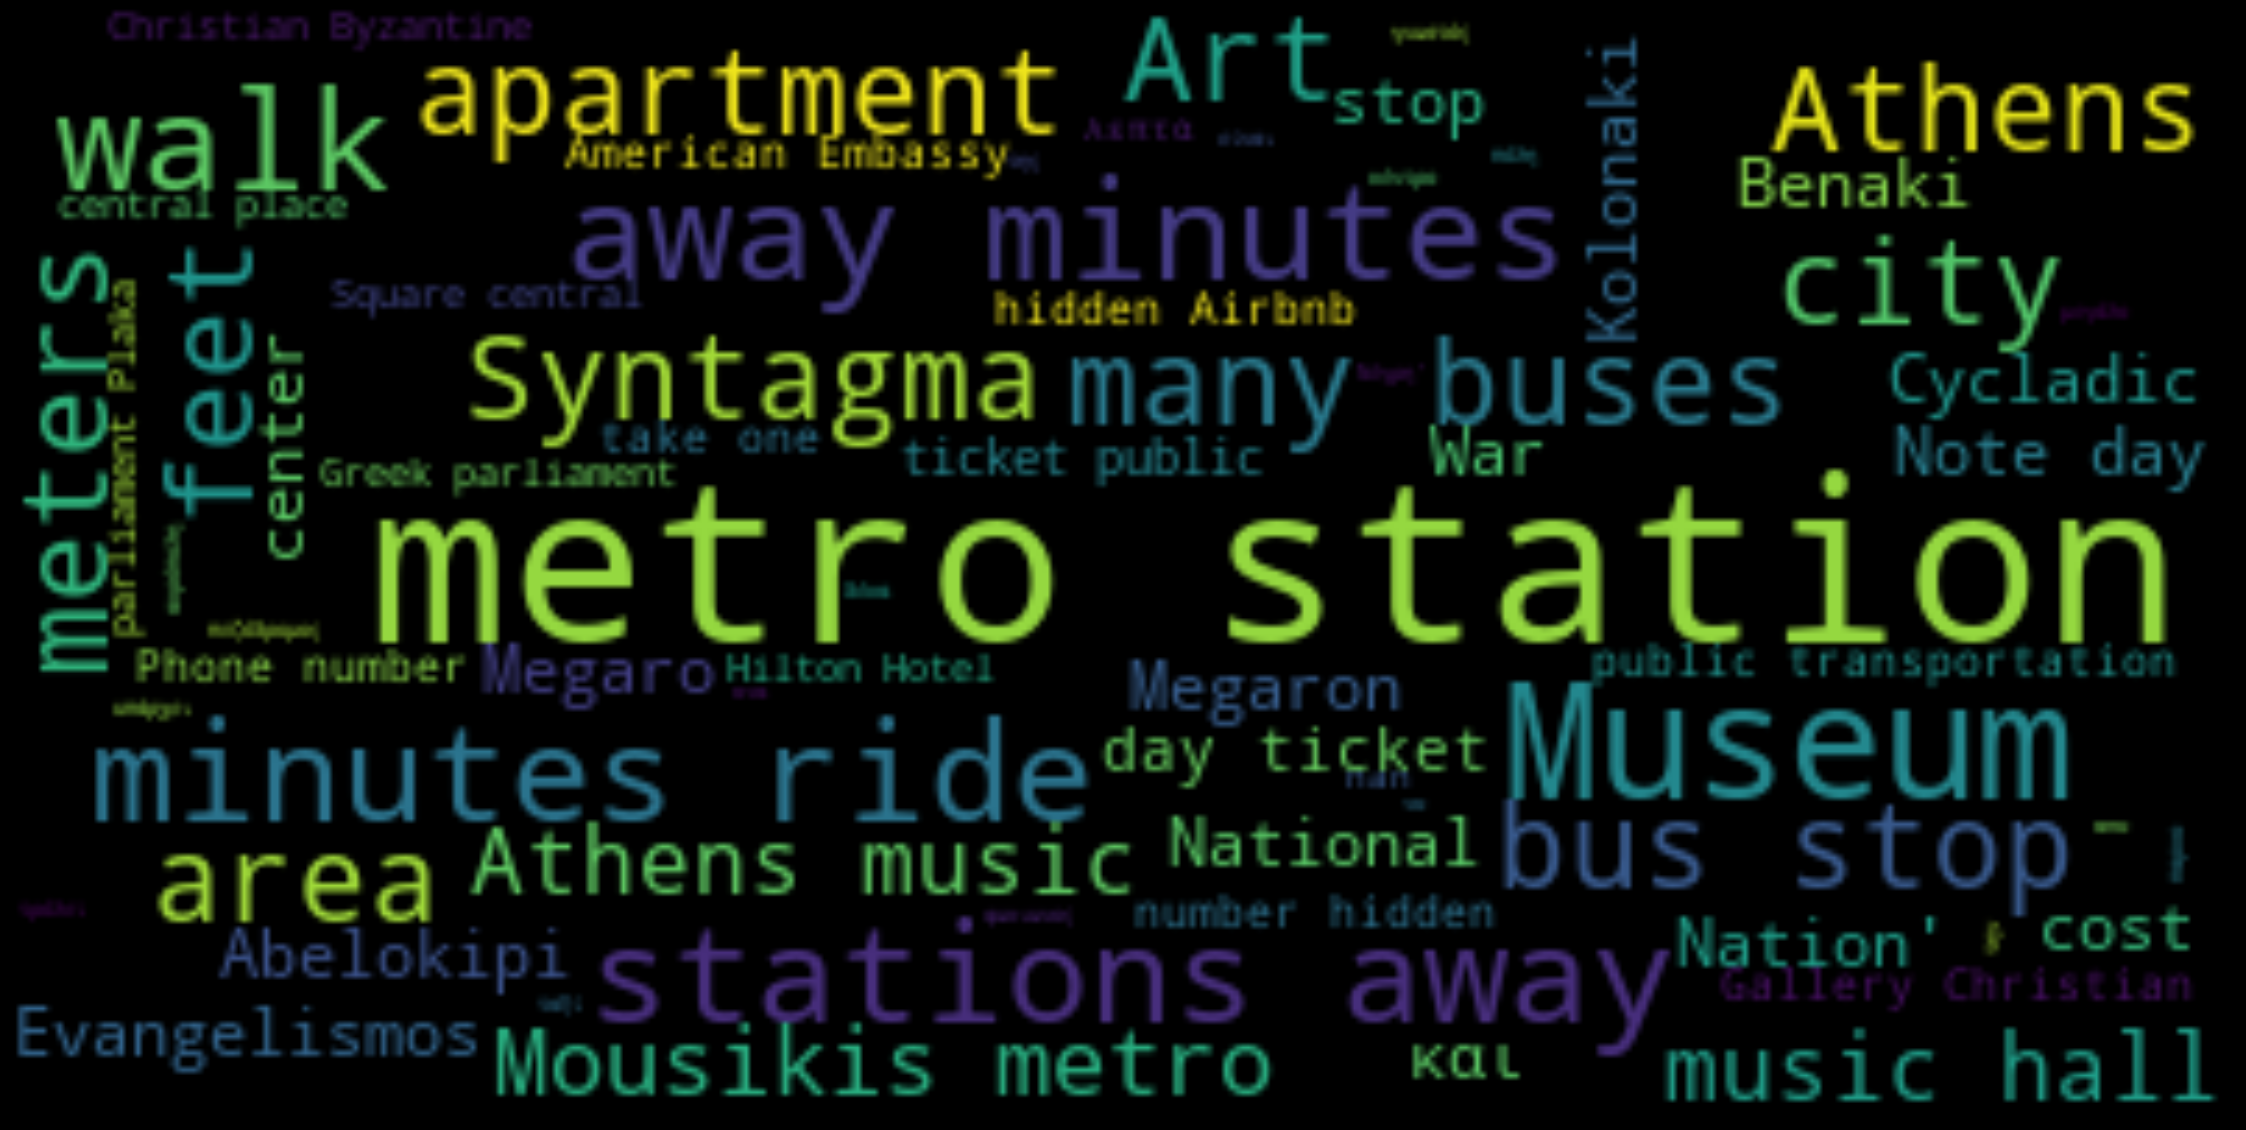

In [16]:
#We show the wordcloud for the values of the column "transit".
text1 = train['transit'].values 
wordcloud = WordCloud(width = 3000, height = 2000, background_color = 'black', stopwords = STOPWORDS)

wordcloud = WordCloud().generate(str(text1))
fig = plt.figure(figsize = (40, 30), facecolor = 'k', edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')

plt.axis("off")
plt.show()

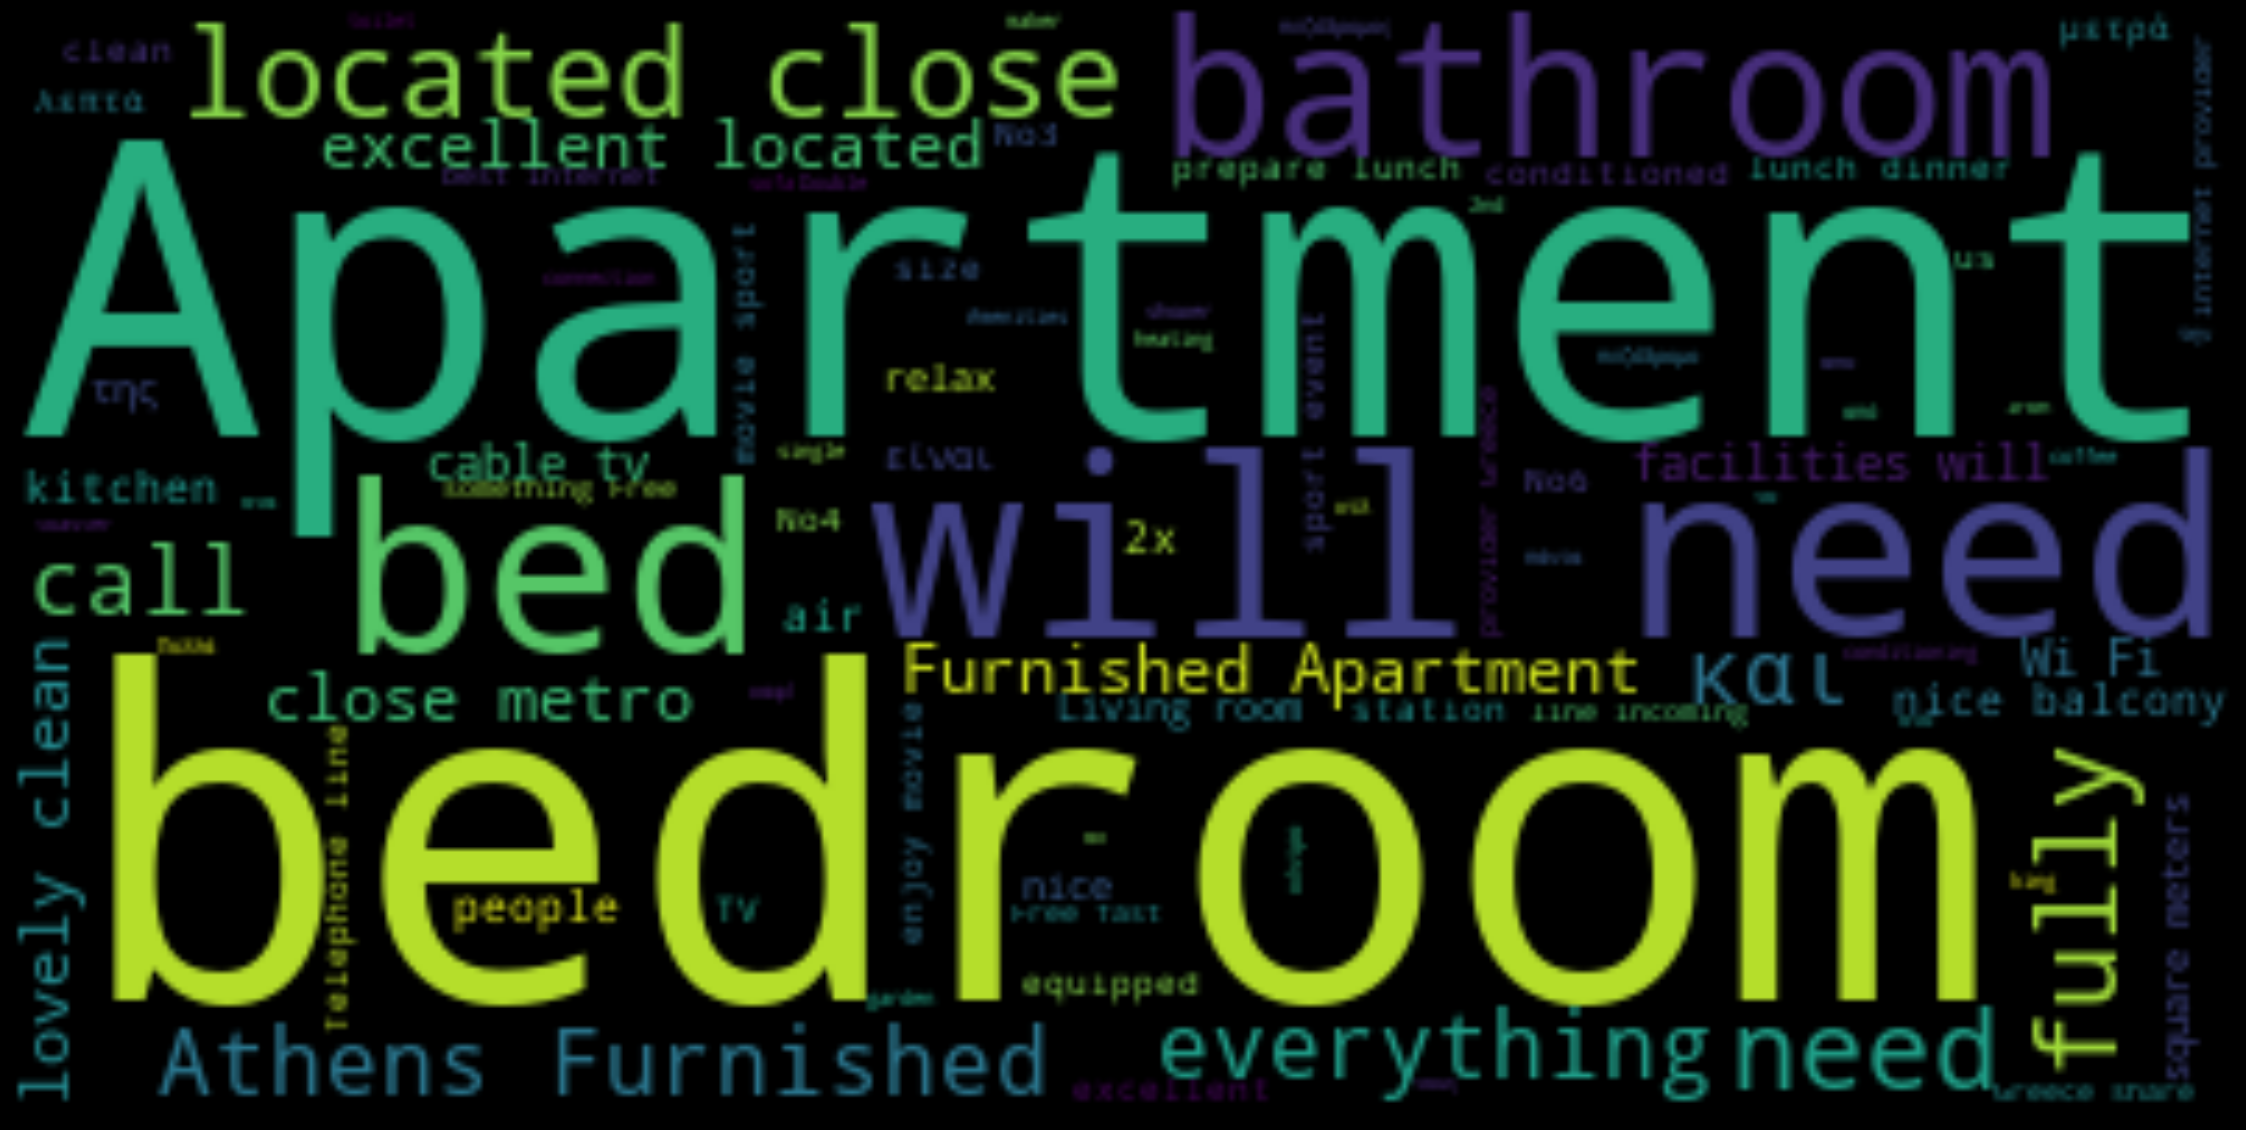

In [17]:
#We show the values of the column "Description" in a wordcloud.
text2 = train['Description'].values
wordcloud = WordCloud(width = 3000, height = 2000, background_color = 'black', stopwords = STOPWORDS)

wordcloud = WordCloud().generate(str(text2))
fig = plt.figure(figsize = (40, 30), facecolor = 'k', edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')

plt.axis("off")
plt.show()

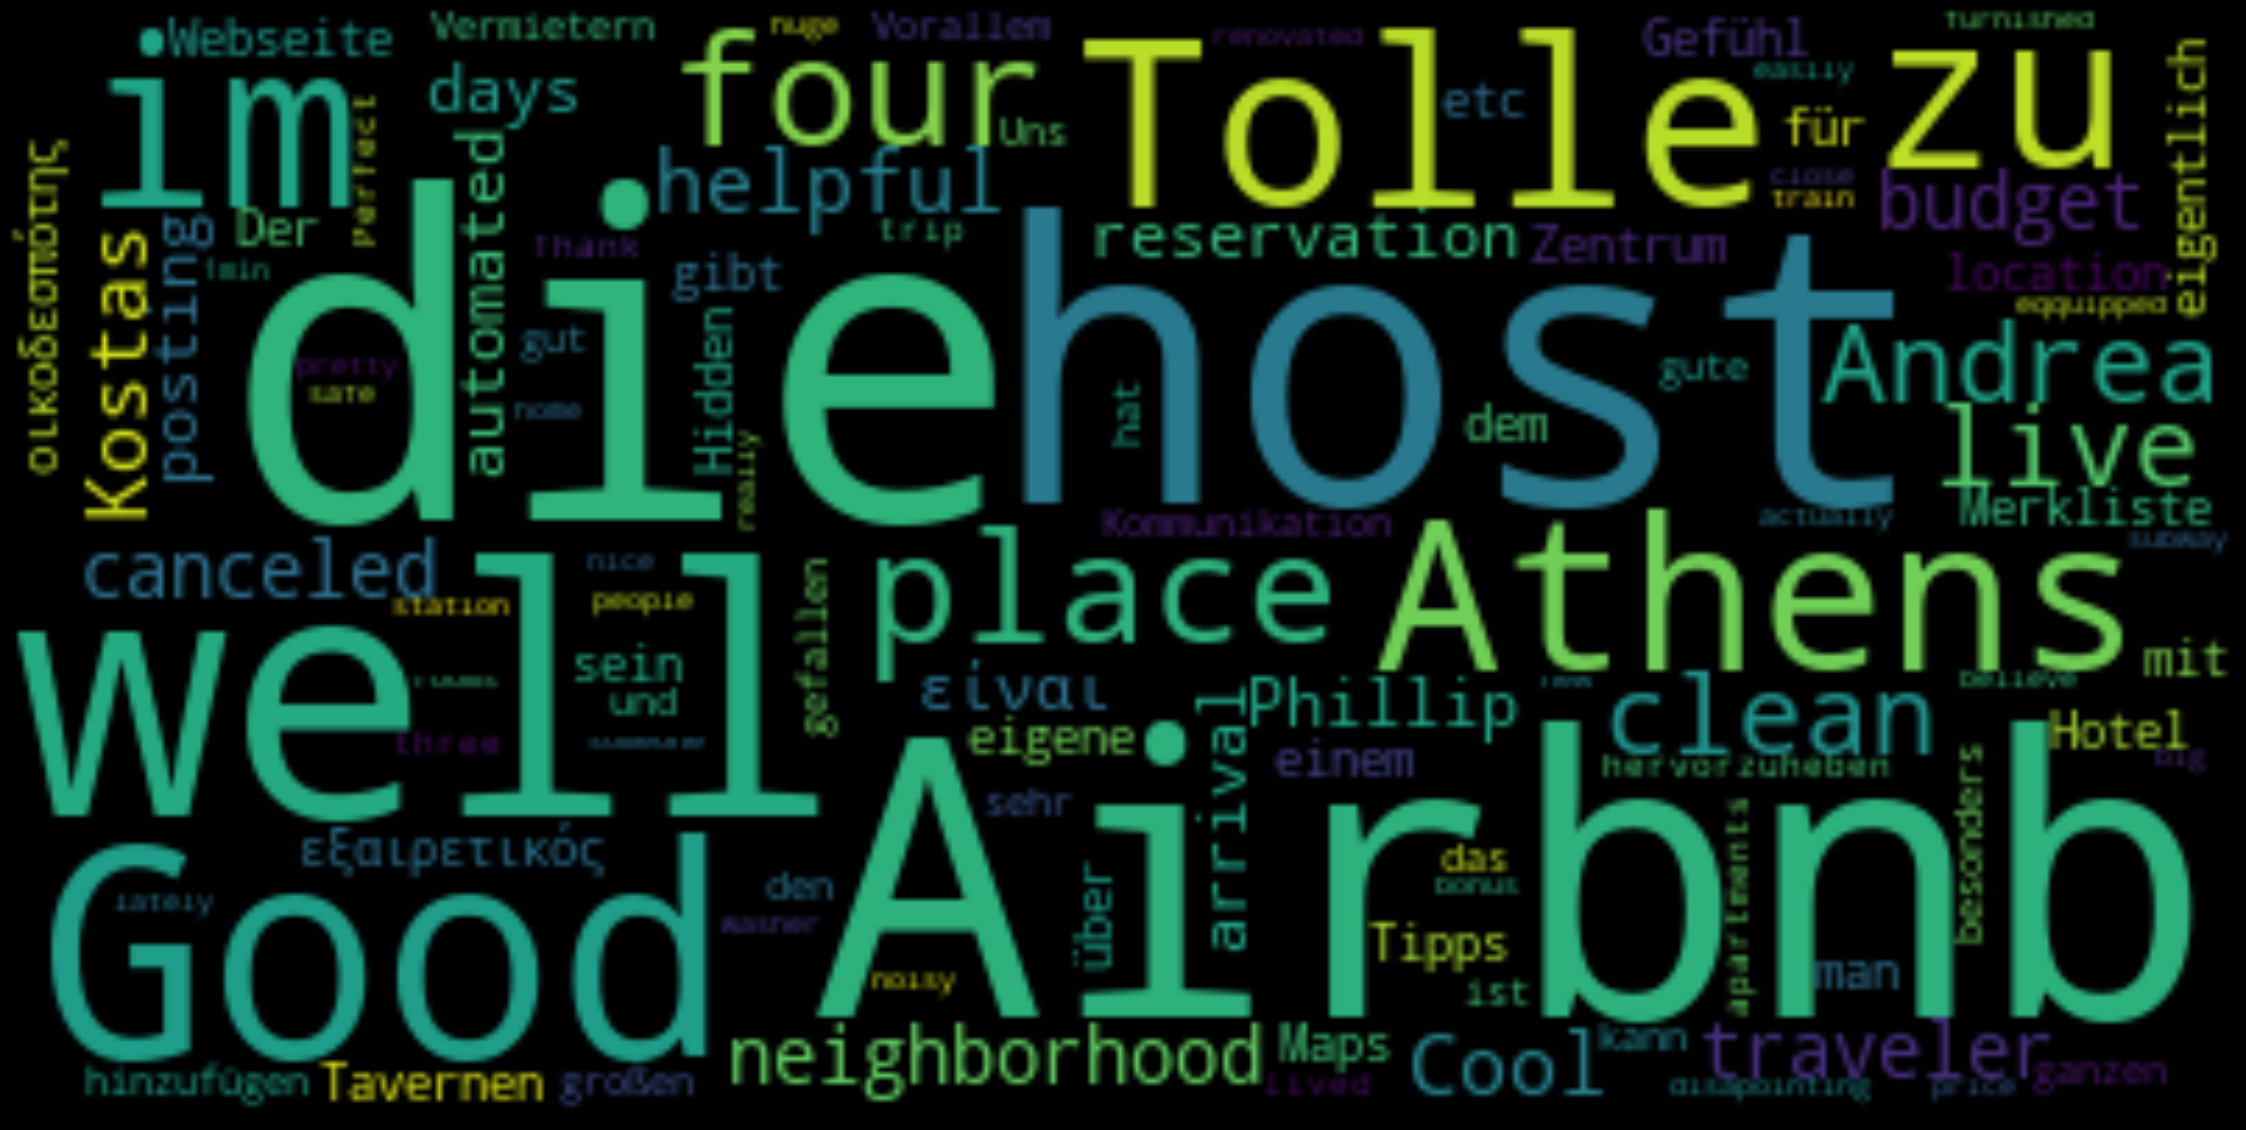

In [18]:
#We will need the reviews.csv file and we take some information from there, because the file is large.
train1 = train.sample(1000)
reviews1 = reviews.sample(5000)
last = train1[['Last_review','id']]

#First, we save to text3 the text reviews. So, if the id in train is the same with the id in reviews and
#if the last_review in train is the same with the date in reviews, then we save the text (comments) in text3.
text3 = ""
for Id, lastreview in zip(last['id'], last['Last_review']):
    for lid, comments, date in zip(reviews1['id'], reviews1['comments'], reviews1['date']):
        if((str(lastreview) == str(date)) & (str(Id) == str(lid))):
            text3 = text3 + comments

#And then we fix the wordcloud of text3.
wordcloud = WordCloud(width = 3000, height = 2000, background_color = 'black', stopwords = STOPWORDS)
wordcloud = WordCloud().generate(str(text3))
fig = plt.figure(figsize = (40, 30), facecolor = 'k', edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')

plt.axis("off")
plt.show()

##                                            QUESTION no12

Number_of_reviews
Property_type                             
Aparthotel                            1045
Apartment                           743718
Bed and breakfast                      649
Boat                                     9
Boutique hotel                         497
Cabin                                   26
Camper/RV                                3
Cave                                  1071
Condominium                          10574
Cottage                                 47
Cycladic house (Greece)                375
Earth house                           2303
Guest suite                           1842
Guesthouse                            1042
Hostel                                3394
Hotel                                  133
House                                28470
In-law                                  53
Loft                                 28124
Minsu (Taiwan)                           0
Other                                  958
Resort                                  11
Serviced apartment                   17099
Tiny house                             424
Townhouse                              900
Villa                                 1110

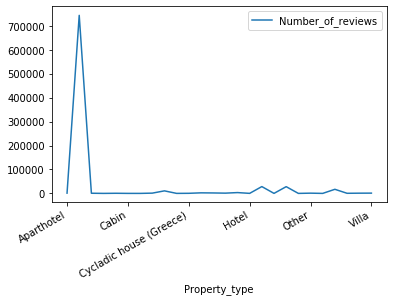

In [19]:
#For each property_type we sum up the number_of_reviews and we show the difference among them with a line plot.
df = train.groupby('Property_type')[['Number_of_reviews']].sum()
df.plot(kind='line', subplots=True)
df

Neighbourhood  Host_response_rate
0        Agios Loukas                  14
1      Agios Nikolaos                  18
2   Akadimia Platonos                  13
3          Ambelokipi                  33
4              Attiki                  19
5           Exarcheia                  26
6                Gazi                  13
7               Goudi                   2
8              Ilisia                  18
9          Kerameikos                  18
10           Kolonaki                  33
11            Kolonos                  12
12            Koukaki                  28
13            Kypseli                  24
14           Larissis                  28
15       Metaxourgeio                  29
16               Mets                  25
17        Monastiraki                   6
18            Neapoli                  18
19        Neos Kosmos                  33
20           Pangrati                  33
21            Patisia                  27
22       Pedion Areos                  24
23          Petralona                  21
24              Plaka                  32
25    Profitis Daniil                   5
26              Psyri                  24
27          Rizoupoli                   3
28               Rouf                   2
29            Sepolia                   6
30            Thiseio                  19
31          Votanikos                   9

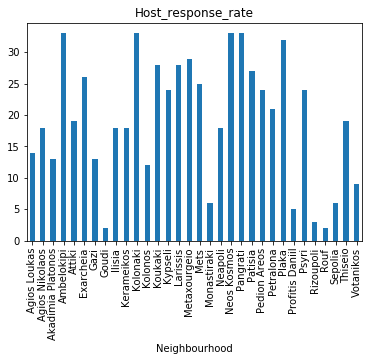

In [20]:
#For each neighbourhood we show at a bar plot the host_response_rate.
df = train.groupby('Neighbourhood')['Host_response_rate'].nunique()
df.plot(kind='bar', subplots=True)
df.reset_index()